In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive'


/content/drive/MyDrive


### libraries:

In [ ]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 1.4 MB/s 


In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from scipy.ndimage import gaussian_filter
from time import time
from gudhi.representations import DiagramSelector, BettiCurve 
import seaborn as sns


### Functions:

In [ ]:
def persistence_to_betti (im):
  
  cc = gd.CubicalComplex(top_dimensional_cells=im)
  cc.compute_persistence()
  H0 = cc.persistence_intervals_in_dimension(0)
  H1 = cc.persistence_intervals_in_dimension(1)
  H2 = cc.persistence_intervals_in_dimension(2)


  pd0 = DiagramSelector(use=True, point_type="finite")(H0) 
  bc0 = BettiCurve(resolution=50, sample_range=[-4,4])(pd0)
  pd1 = DiagramSelector(use=True, point_type="finite")(H1) 
  bc1 = BettiCurve(resolution=50, sample_range=[-4,4])(pd1)
  pd2 = DiagramSelector(use=True, point_type="finite")(H2) 
  bc2 = BettiCurve(resolution=50, sample_range=[-4,4])(pd2)

  return bc0 , bc1 , bc2


In [ ]:
# this function will divide every box to 8 parts and then it will give mean and standard deviation of different part

def persistence_mean_std(den):
  image = den/den.std()
  image -= image.mean()
  w = 128
  BC0=[]; BC1=[]; BC2=[]
  for i in range(2):  
    for j in range(2):
      for k in range(2):
        im = image[i*w:(i+1)*w,j*w:(j+1)*w,k*w:(k+1)*w]
        BCs = persistence_to_betti(im)   
        BC0.append(BCs[0]) ; BC1.append(BCs[1]) ; BC2.append(BCs[2])
  #Means and std
  bc0_mean = np.mean(BC0, 0) ; bc1_mean = np.mean(BC1, 0) ; bc2_mean = np.mean(BC2, 0)
  bc0_std = np.std(BC0, 0)/7**.5 ; bc1_std = np.std(BC1, 0)/7**.5 ; bc2_std = np.std(BC2, 0)/7**.5
  return bc0_mean, bc1_mean, bc2_mean, bc0_std, bc1_std, bc2_std

### calling for images

In [ ]:
b=gaussian_filter(np.load('256_'+str(3)+'.npz')['density'],2)
b.shape

(256, 256, 256)

In [ ]:
boxes= []
box_number=[3, 17 ,32 ,41, 54, 68, 85, 103, 135]
zs=        [40, 20, 10, 7, 4, 2, 1, 0.5, 0] #2 7 10


for i in box_number:
  box = gaussian_filter(np.load('256_'+str(i)+'.npz')['density'],2)
  # boxes= np.append(boxes, [box], axis=0)
  boxes.append(box)

In [ ]:
boxes=np.array(boxes)
boxes.shape

(9, 256, 256, 256)

### betti curves

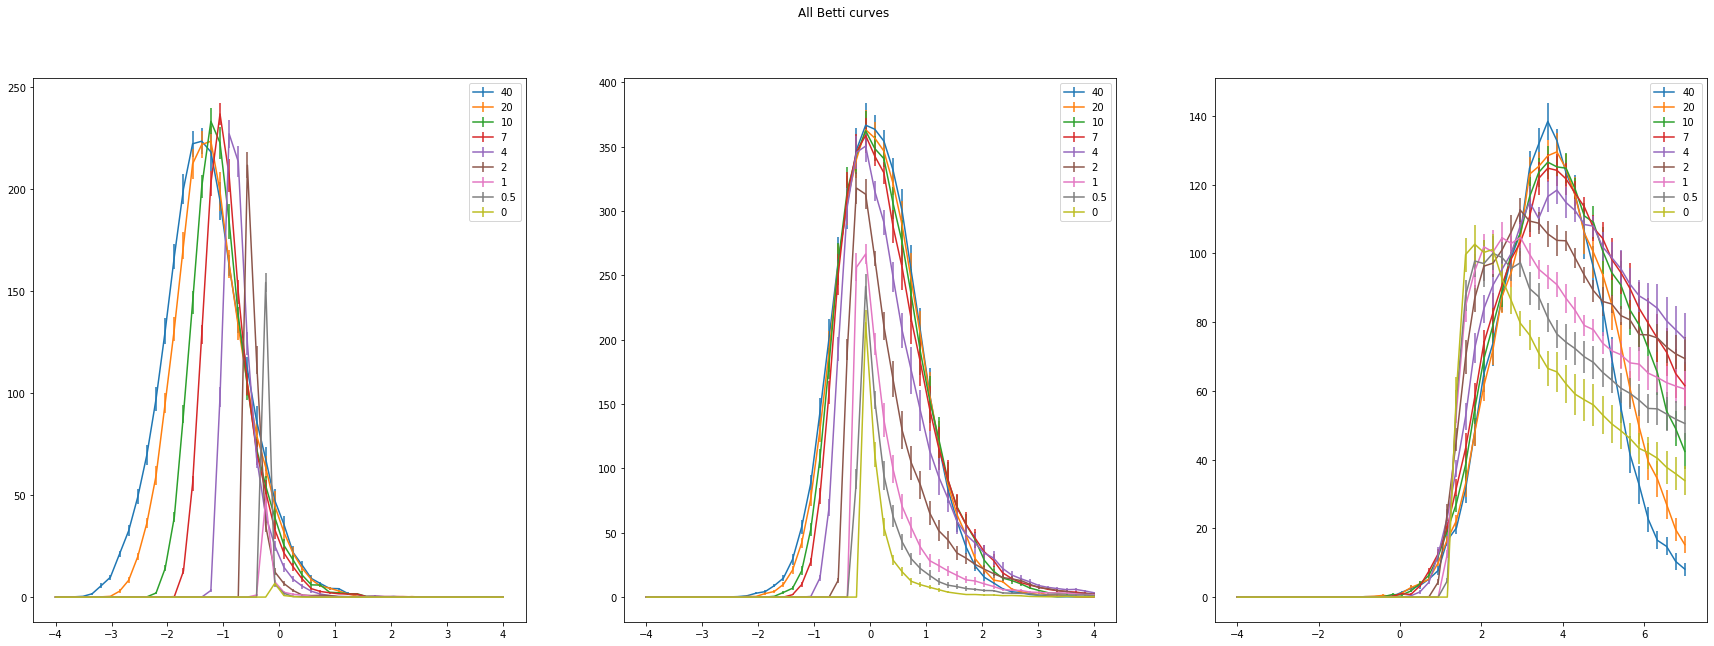

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(30,10))
plt.suptitle('All Betti curves')

for i,d in enumerate(boxes):
  
  bc0_mean, bc1_mean, bc2_mean, bc0_std, bc1_std, bc2_std = persistence_mean_std(d)
  ax[0].errorbar(x=np.linspace(-4,4,50), y=bc0_mean, yerr=bc0_std, label=f'{zs[i]}');
  ax[1].errorbar(x=np.linspace(-4,4,50), y=bc1_mean, yerr=bc1_std, label=f'{zs[i]}');
  ax[2].errorbar(x=np.linspace(-4,7,50), y=bc2_mean, yerr=bc2_std, label=f'{zs[i]}');
for i in range(3): ax[i].legend()

In [ ]:
fig.savefig('bettinumbers.eps', format = 'svg', dpi=300)